# Experimento 6 : Test te results

## Load the CBNs and show his topologies

Número total de archivos pickle encontrados: 4
Archivos pickle encontrados:
outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_3.pkl
outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_4.pkl
outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_5.pkl
outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_6.pkl
Cargando archivo: outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_3.pkl
Cargando archivo: outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_4.pkl
Cargando archivo: outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_5.pkl
Cargando archivo: outputs/exp6_data_3_6_10/pkl_cbn/cbn_2_6.pkl


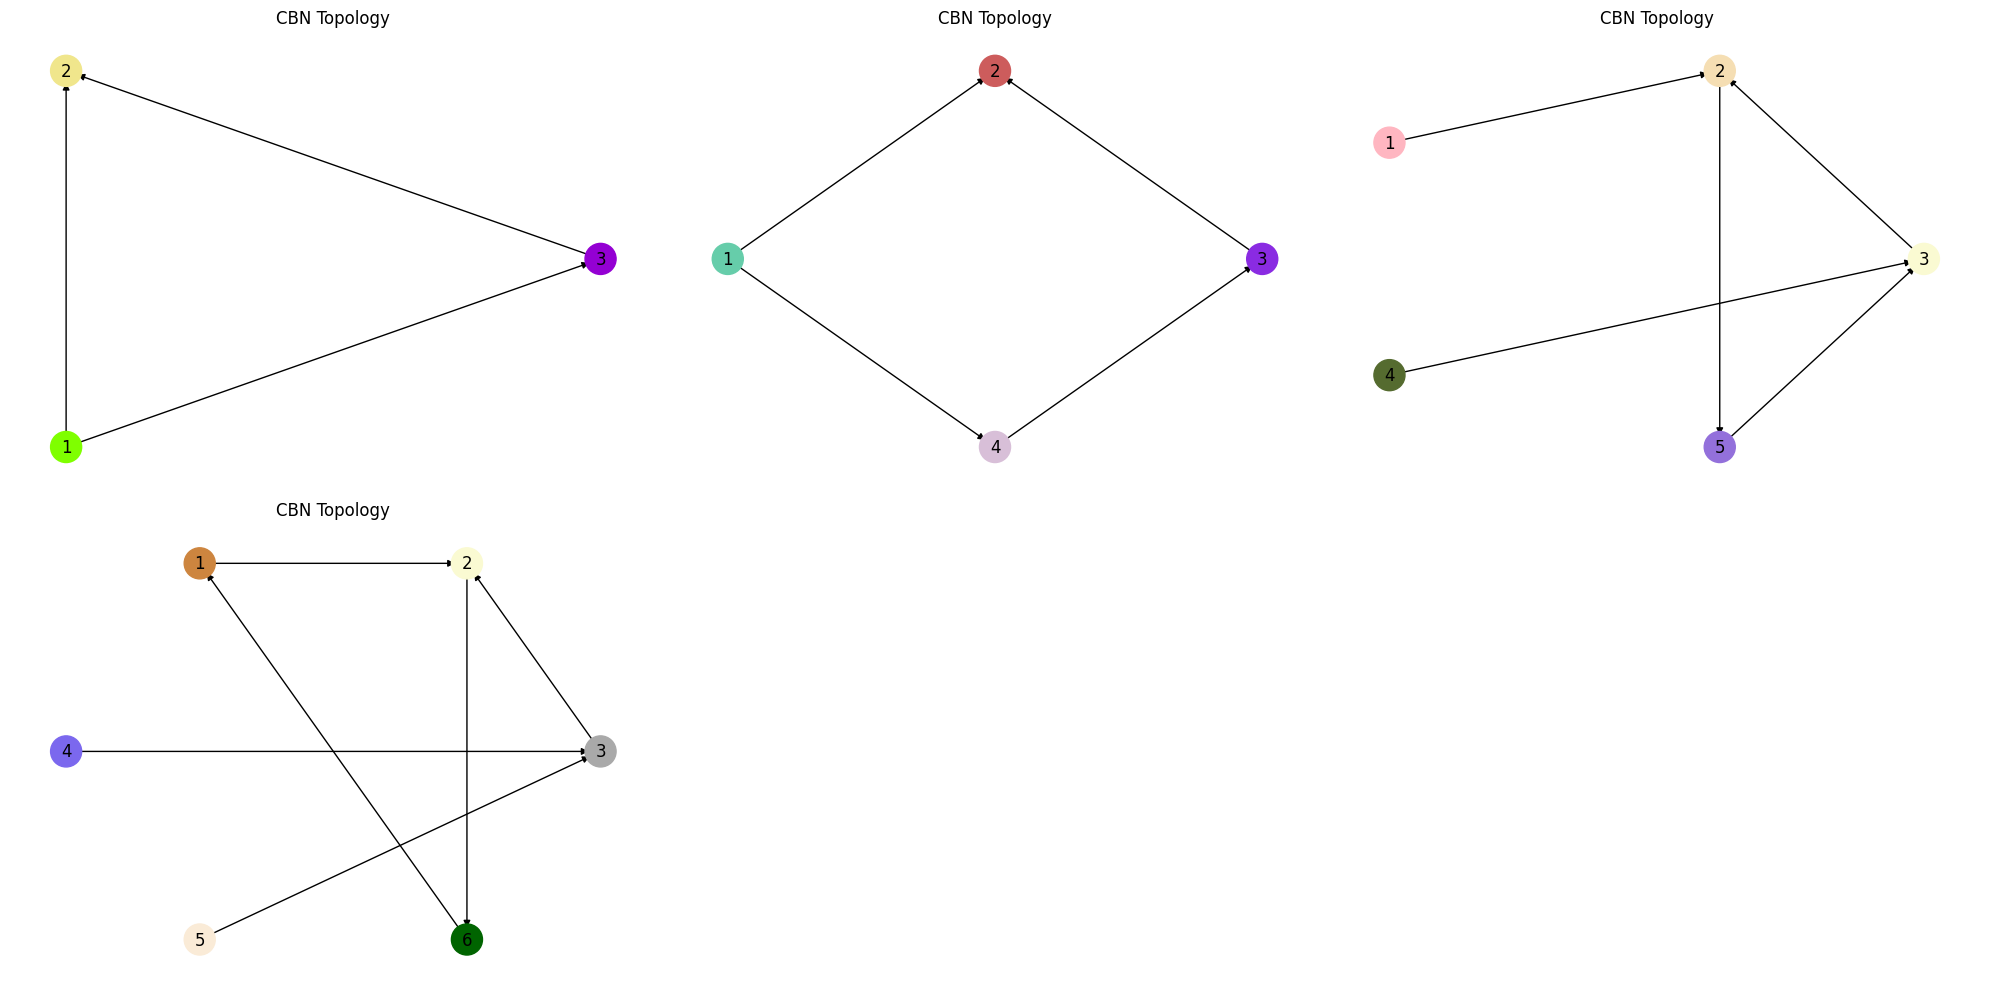

In [23]:
import pickle
import os
import matplotlib.pyplot as plt

# Define el segundo número en la ruta del archivo pickle
first_number = 2
second_number = 3  # Cambia esto según sea necesario

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp6_data_3_6_10/pkl_cbn/cbn_{first_number}_'

# Número inicial y rango máximo
start_number = second_number
max_number = 2 * start_number

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(start_number, max_number + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)
print(f"Número total de archivos pickle encontrados: {total_graphs}")

# Imprimir los nombres de los archivos pickle encontrados
print("Archivos pickle encontrados:")
for file in pickle_files:
    print(file)

# Verificar si hay gráficos para mostrar
if total_graphs > 0:
    # Configuración de subplots en múltiples filas y columnas
    cols = 3
    rows = (total_graphs + cols - 1) // cols  # Calcula el número de filas necesario

    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

    # Aplanar la matriz de ejes si hay más de una fila
    if rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Iterador para cargar y mostrar las topologías
    for path_cbn, ax in zip(pickle_files, axes):
        print(f"Cargando archivo: {path_cbn}")
        with open(path_cbn, 'rb') as file:
            o_cbn = pickle.load(file)

        # Mostrar la información de CBN en el subplot correspondiente
        o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax

    # Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
    for ax in axes[total_graphs:]:
        fig.delaxes(ax)

    # Ajustar el layout y mostrar todas las gráficas juntas
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron archivos pickle para mostrar.")


In [24]:
# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
        o_cbn.show_description()

**************************************************
CBN DESCRIPTION
LOCAL NETWORKS: [1, 2, 3]
--------------------------------------------------
Local Network: 1
Internal Variables:  [1, 2, 3, 4, 5]
External Variables:  []
Total Variables:  [1, 2, 3, 4, 5]
Variable Index: 1 -> CNF :[[-5, -1]]
Variable Index: 2 -> CNF :[[-4, 3]]
Variable Index: 3 -> CNF :[[-5, -2]]
Variable Index: 4 -> CNF :[[3, 4]]
Variable Index: 5 -> CNF :[[-4, 5], [-3, 5]]
--------------------------------------------------
Local Network: 2
Internal Variables:  [6, 7, 8, 9, 10]
External Variables:  [16, 17]
Total Variables:  [6, 7, 8, 9, 10, 16, 17]
Variable Index: 6 -> CNF :[[16, 17], [-10, -6]]
Variable Index: 7 -> CNF :[[-9, 8]]
Variable Index: 8 -> CNF :[[-10, -7]]
Variable Index: 9 -> CNF :[[16, 17], [8, 9]]
Variable Index: 10 -> CNF :[[-9, 10], [-8, 10]]
--------------------------------------------------
Local Network: 3
Internal Variables:  [11, 12, 13, 14, 15]
External Variables:  [18]
Total Variables:  [11, 1

In [25]:
import contextlib
import io

# Crear la carpeta de descripción si no existe
description_folder = 'description'
os.makedirs(description_folder, exist_ok=True)

# Función para extraer el índice del archivo pickle
def extract_index(file_path):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    return file_name.split('_')[-1]

# Iterador para cargar y guardar las descripciones
for path_cbn in pickle_files:
    idx = extract_index(path_cbn)
    
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Capturar la salida de o_cbn.show_description()
    description = io.StringIO()
    with contextlib.redirect_stdout(description):
        o_cbn.show_description()
    
    # Guardar la descripción en un archivo de texto
    description_file_path = os.path.join(description_folder, f'description_{idx}.txt')
    with open(description_file_path, 'w') as desc_file:
        desc_file.write(description.getvalue())

print("Descripciones guardadas en la carpeta 'description'.")

Descripciones guardadas en la carpeta 'description'.
